In this project I will be utilyzing python to analyze a dataset containing information about each company on the Inc. 5000 list in 2019. The fields include the company name, industry, founding year, website, and location, as well as 2019 revenue, percentage growth, number of workers (year-over-year), and the number of years on the list.

RECOMMENDED ANALYSIS:
1. What's the average revenue among companies on the list? Broken down by industry?
2. Which industries are most and least represented in the list?
3. Do you notice any interesting geographic trends?
4. Which industries saw the largest average growth rate?
5. Which companies had the largest increase in staff/ new hires?
6. Did any companies increase revenue while reducing staff?

Before I begin my analysis I will first need to import a few neccessary libraries for analysis and visualizations, as well as set some options. 

**numpy** for numerical calculations

**pandas** for data manipulation and dataframe creation

**matplotlib** for data visualizations 

**seaborn** for advanced data visualizations

**os** for searching my directory for files

In [1]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use("ggplot")
import seaborn as sns
sns.set_style("darkgrid")
import os

I'll start with checking my current working directory.

In [2]:
os.getcwd()

'c:\\Users\\mjaso\\OneDrive'

Now I will change my directory to search for all of my download files. list all of my directories, to determine which folder my csv is located.

In [3]:
os.chdir('c:\\Users\\mjaso\\Downloads\\INC+5000+Companies+2019.csv')

Now I can list all of the files in this folder to locate the csv file that I will be using in this project.

In [4]:
os.listdir()

['INC 5000 Companies 2019.csv', '__MACOSX']

Perfect! Now that I have found my csv file, I can now read that data into a pandas dataframe.

In [5]:
Inc_5000_Companies = pd.read_csv(r'c:\\Users\\mjaso\\Downloads\\INC+5000+Companies+2019.csv\\INC 5000 Companies 2019.csv')

##### DATA EXAMINATION:

Now that I have my dataframe created, I will preview the first and last 5 rows of data to check for consistency.

###### **Checking the first 5 rows of data**

In [6]:
Inc_5000_Companies.head()

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


###### **Checking the last 5 rows of data**

In [7]:
Inc_5000_Companies.tail()

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
5007,4996,https://www.inc.com/profile/village-plumbing-air,Village Plumbing & Air,villageplumbing.com,TX,15.8 Million,52.2377,Consumer Products & Services,88.0,62,1946,3,Houston,Houston
5008,4997,https://www.inc.com/profile/real-restoration-g...,Real Restoration Group,realrestoration.com,IL,11.6 Million,52.2127,Construction,380.0,220,2011,1,Chicago,Chicago
5009,4998,https://www.inc.com/profile/naval-systems,Naval Systems,n-s-i.us,MD,29.7 Million,52.2037,Government Services,187.0,127,2004,1,NaN,LEXINGTON PARK
5010,4999,https://www.inc.com/profile/hnm-systems,HNM Systems,hnmsystems.com,CA,8.8 Million,52.1919,Telecommunications,132.0,47,2011,1,San Diego,Solana Beach
5011,5000,https://www.inc.com/profile/vivayic,Vivayic,vivayic.com,NE,4.5 Million,52.1691,Business Products & Services,27.0,22,2006,4,NaN,Lincoln


The data has been imported successfully, although I do notice that at least one name in the city column is in all caps. I will not address this issue now but I will during my data cleaning steps I will change that to proper capitalization.

Now I will check how many rows and columns are in this dataframe.

###### **Checking the size and shape of the dataframe**

In [8]:
row = Inc_5000_Companies.shape[0]
col = Inc_5000_Companies.shape[1]
print(f"This dataframe has {row} rows and {col} columns associated with it.")

This dataframe has 5012 rows and 14 columns associated with it.


Now I will check for any duplicate rows of data. If there are any duplicates, I will remove them from the dataframe.

###### **Checking for duplicate rows of data**

In [9]:
duplicate = Inc_5000_Companies.duplicated().sum()
print(f"This dataframe has {duplicate} rows of duplicated data.")

This dataframe has 0 rows of duplicated data.


I will now use a for loop to iterate through all of the columns in the dataframe to check for the number of null values in each column, and to check for the number of unique values in each column.

###### **Checking the number of null values**

In [10]:
for n in Inc_5000_Companies.columns:
    null = Inc_5000_Companies[n].isnull().sum()
    print(f"The number of null values in column {n} is {null}")

The number of null values in column rank is 0
The number of null values in column profile is 0
The number of null values in column name is 0
The number of null values in column url is 0
The number of null values in column state is 0
The number of null values in column revenue is 0
The number of null values in column growth_% is 0
The number of null values in column industry is 0
The number of null values in column workers is 1
The number of null values in column previous_workers is 0
The number of null values in column founded is 0
The number of null values in column yrs_on_list is 0
The number of null values in column metro is 813
The number of null values in column city is 0


There are two columns that have null values; the 'workers' column and the 'metro' column. It is not neccessary to address the null values in the 'metro' column for this analysis but I will remove the null in the 'workers' column during the data cleaning step.

###### **Checking the number of unique values**

In [11]:
for u in Inc_5000_Companies.columns:
    uni = Inc_5000_Companies[u].nunique()
    print(f"The column {u} has {uni} unique values.")

The column rank has 4999 unique values.
The column profile has 5012 unique values.
The column name has 5012 unique values.
The column url has 5012 unique values.
The column state has 51 unique values.
The column revenue has 1015 unique values.
The column growth_% has 5006 unique values.
The column industry has 27 unique values.
The column workers has 635 unique values.
The column previous_workers has 443 unique values.
The column founded has 83 unique values.
The column yrs_on_list has 14 unique values.
The column metro has 70 unique values.
The column city has 1558 unique values.


The information above has provided a little insight into the dataframe. Now I will check the statistical information of the numerical and categorical columns to provide further insight.

###### **Checking the statistical information of the numerical columns**

In [12]:
Inc_5000_Companies.describe()

,rank,growth_%,workers,previous_workers,founded,yrs_on_list
count,5012.000000,5012.000000,5011.000000,5012.000000,5012.000000,5012.000000
mean,2499.628292,454.680059,242.783077,111.687151,2005.445531,2.813647
std,1443.232009,1284.288709,2800.165478,1073.878175,30.310632,2.265986
min,1.000000,52.169100,0.000000,1.000000,0.000000,1.000000
25%,1249.750000,90.562500,22.000000,8.000000,2003.000000,1.000000
50%,2497.500000,157.530650,48.000000,20.000000,2009.000000,2.000000
75%,3749.250000,330.427250,116.000000,50.000000,2012.000000,4.000000
max,5000.000000,36680.388200,155000.000000,53000.000000,2016.000000,14.000000


In [13]:
Inc_5000_Companies.describe(include="object")

,profile,name,url,state,revenue,industry,metro,city
count,5012,5012,5012,5012,5012,5012,4199,5012
unique,5012,5012,5012,51,1015,27,70,1558
top,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,CA,2.2 Million,Business Products & Services,New York City,New York
freq,1,1,1,712,64,492,353,165


Now I will check the dtypes in the dataframe to ensure they are in the correct format, this is a key step because it ensures accuracy during analysis.

###### **Checking the dytpes in the dataframe**

In [14]:
Inc_5000_Companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   object 
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


##### DATA CLEANING:

For this dataframe I will have to perform some data cleaning. I will begin by stripping the white spaces from the 'revenue' column. Then I will create and define a function that splits the values in the column at the first delimeter, the first space. Then I will create two new columns named 'new revenue' and 'revenue dollar amount' and apply the results of the function to the values of the new columns. Finally, I will drop the old 'revenue' column from the dataframe and verify that the changes were updated in the dataframe.

###### **Stripping the white space from the 'revenue column**

In [15]:
Inc_5000_Companies["revenue"] = Inc_5000_Companies["revenue"].str.strip()

###### **Verifying the changes have been successfully made**

In [16]:
Inc_5000_Companies["revenue"].head()

0    36.9 Million
1    33.6 Million
2    24.9 Million
3    32.4 Million
4    22.5 Million
Name: revenue, dtype: object

###### **Creating, defining, and applying a function to split the values in the 'revenue' column at the space delimeter**

In [17]:
def c_split(col) :
    return pd.Series(col.split(" ", 1))

Inc_5000_Companies[["new revenue", "revenue dollar amount"]] = Inc_5000_Companies["revenue"].apply(c_split)

Inc_5000_Companies.drop(columns=["revenue"], inplace=True)

Inc_5000_Companies.head()

,rank,profile,name,url,state,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city,new revenue,revenue dollar amount
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix,36.9,Million
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood,33.6,Million
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin,24.9,Million
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque,32.4,Million
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia,22.5,Million


###### **Converting the values in the 'new revenue' column to float dtypes**

In [18]:
Inc_5000_Companies["new revenue"] = Inc_5000_Companies["new revenue"].astype(float)

Now that I have cleaned that column, I will check to verify that the changes have been made.

###### **Verifying changes have been made to the 'revenue' column**

In [19]:
Inc_5000_Companies["new revenue"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5012 entries, 0 to 5011
Series name: new revenue
Non-Null Count  Dtype  
--------------  -----  
5012 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


Now I will convert the column 'founded' from dtype 'object' to 'datetime' 'year' dtype.

###### **Converting the column 'founded' to 'datetime' dtype**

In [20]:
Inc_5000_Companies["founded"] = pd.to_datetime(Inc_5000_Companies["founded"])
Inc_5000_Companies["founded"] = Inc_5000_Companies["founded"].dt.year

The column 'founded' has now been converted to the correct dtype. I will now verify the changes.

In [21]:
Inc_5000_Companies["founded"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5012 entries, 0 to 5011
Series name: founded
Non-Null Count  Dtype
--------------  -----
5012 non-null   int64
dtypes: int64(1)
memory usage: 39.3 KB


The last step in the data cleaning process will be to remove the row with the null value from the dataframe. Usually it is good practice to check with the stakeholder or the data keeper to decide what should be done with null values. For the sake of this project, I will remove the null from the dataframe because it can effect calculations.

###### **Removing null values from the column 'workers'**

In [22]:
Inc_5000_Companies.dropna(subset=["workers"], inplace=True)

The null value in the column 'workers' has now been removed, I will verify that the changes has been made.

In [23]:
null_in_workers = Inc_5000_Companies["workers"].isnull().sum()
print(f"There are {null_in_workers} values in the column 'workers'.")

There are 0 values in the column 'workers'.


The dataframe has now been cleaned and is ready for analysis. I will now begin to answer the questions that are associated with this project.

##### RECOMMENDED ANALYSIS:

1. What's the average revenue among companies on the list? Broken down by industry?

In [84]:
avg_companies_revenue = Inc_5000_Companies.groupby("industry")["new revenue"].mean().reset_index()
avg_companies_revenue = round(avg_companies_revenue, 1).rename(columns={"new revenue": "In Millions (USD)"}).sort_values(by="In Millions (USD)", ascending=False).reset_index()
avg_companies_revenue.drop(columns=["index"], inplace=True)
avg_companies_revenue

,industry,In Millions (USD)
0,Insurance,58.7
1,Logistics & Transportation,53.5
2,Health,45.3
3,Energy,44.4
4,Financial Services,40.0
5,Food & Beverage,39.9
6,Security,37.3
7,Government Services,36.5
8,Construction,36.4
9,Retail,35.9


The above dataframe displays the average revenue in millions (USD) for each industry. I will now build a bar chart to visualize the average revenue per industry.

###### **Creating a bar chart to visualize the average revenue per industry**

The bar graph below shows that insurance industry has the highest average revenue while the media industry has the lowest average revenue.


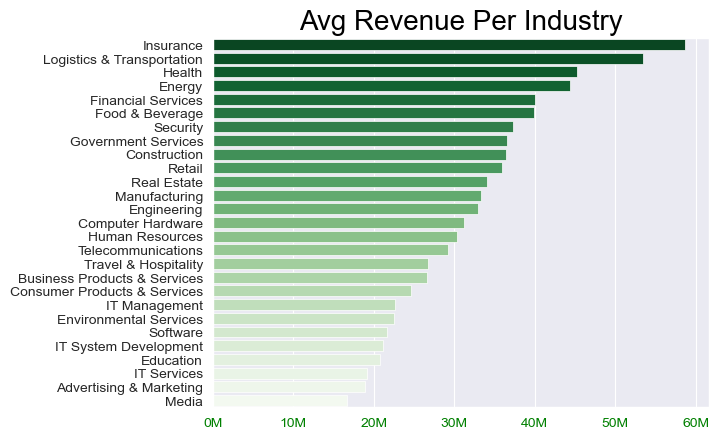

In [373]:
sns.barplot(data=avg_companies_revenue, x="In Millions (USD)", y="industry", palette="Greens_r")
plt.title("Avg Revenue Per Industry",
          fontsize=20,
          color="black")
plt.ylabel("")
plt.xlabel("")
cash = list(range(0, 70, 10))
plt.xticks(cash, [f"{c}M" for c in cash],
           color="green")
print("The bar graph below shows that insurance industry has the highest average revenue while the media industry has the lowest average revenue.")

2. Which industries are most and least represented in the list?

In [106]:
industry_representation = Inc_5000_Companies.groupby("industry")["name"].count().sort_values(ascending=False).reset_index().rename(columns={"name": "number of companies"})
industry_representation

,industry,number of companies
0,Business Products & Services,492
1,Advertising & Marketing,489
2,Software,461
3,Health,356
4,Construction,350
5,Consumer Products & Services,314
6,IT Management,276
7,Financial Services,239
8,Government Services,236
9,Real Estate,198


Above is a table of the number of companies representing each industry. I will now build a visual to represent this table.

###### **Creating a chart to visualize the number of companies per industry**

The top 5 industries that are represented are Business Products & Services, Advertising & Marketing, Software, Health, and Construction.
The bottom 5 industries represented are Computer Hardware, Environmental Services, IT Services, Media, and Travel & Hospitality.


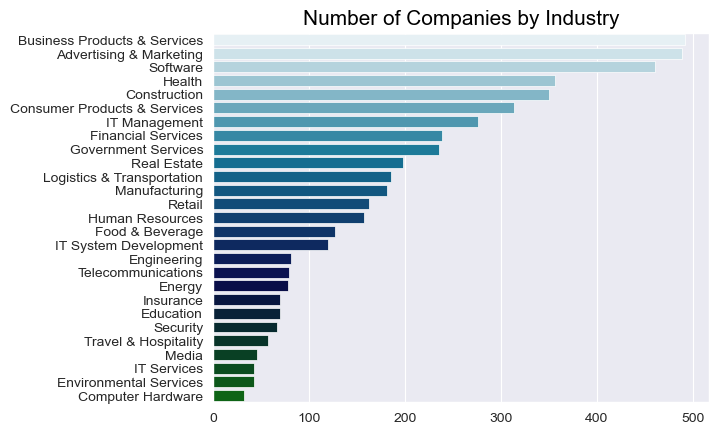

In [383]:
sns.barplot(data=industry_representation, y="industry", x="number of companies", palette="ocean_r")
plt.title("Number of Companies by Industry",
          fontsize=15,
          color="black")
plt.xlabel("")
plt.ylabel("")
print("""The top 5 industries that are represented are Business Products & Services, Advertising & Marketing, Software, Health, and Construction.
The bottom 5 industries represented are Computer Hardware, Environmental Services, IT Services, Media, and Travel & Hospitality.""")

3. Do you notice any interesting geographic trends?

To start this question, I will create 4 dataframes based on geographical regions, the northeast, midwest, south, and west, with the maximum, minimum, and average revenues for each state in those regions. I will then take the average revenue of each geographical region and visualize those results in a bar graph to determine which geographical region has the higest average revenue.

###### **Max, min, avg revenue for states in the northeast region**

In [272]:
geographical = Inc_5000_Companies.groupby("state").agg(max_revenue=("new revenue", "max"), min_revenue=("new revenue", "min"), avg_revenue=("new revenue", "mean"))
geographical

geographical_northeast = geographical.loc[["ME", "VT", "NH", "MA", "CT", "RI", "NJ", "NY", "PA"]].sort_values(by="avg_revenue", ascending=False)
geographical_northeast

def highlight_max_min(row):     # function defined and created to highlight all of values in a specific row
    max_value = row["max_revenue"].max()
    min_value = row["min_revenue"].min()
    return["background-color: red" if val == min_value
           else "background-color: red" if val == min_value
           else " " for val in row]
geographical_northeast.style.background_gradient(subset=pd.IndexSlice[:,["max_revenue"]], cmap="Greens")        # Use either background gradient to pick what column will be highlighted
geographical_northeast.style.background_gradient(subset=pd.IndexSlice[:,["min_revenue"]], cmap="Reds") 
geographical_northeast.style.background_gradient(subset=pd.IndexSlice[:,["avg_revenue"]], cmap="Blues") 

,max_revenue,min_revenue,avg_revenue
state,,,
PA,726.100000,2.100000,41.376163
MA,368.600000,2.100000,38.963910
NJ,741.400000,2.000000,35.086719
NY,983.300000,2.000000,27.693333
NH,193.300000,2.100000,22.785000
CT,104.000000,1.000000,19.797297
ME,71.400000,2.500000,14.172727
RI,15.200000,2.300000,6.620000
VT,14.600000,2.700000,6.480000


###### **Max, min, avg revenue for states in the midwest region**

In [273]:
geographical_midwest = geographical.loc[["OH", "MI", "IN", "WI", "IL", "MO", "IA", "MN", "KS", "NE", "SD", "ND"]].sort_values(by="avg_revenue", ascending=False)
geographical_midwest

def highlight_max_min(row):     # function defined and created to highlight all of values in a specific row
    max_value = row["max_revenue"].max()
    min_value = row["min_revenue"].min()
    return["background-color: green" if val == max_value
           else "background-color: red" if val == min_value
           else " " for val in row]
geographical_midwest.style.background_gradient(subset=pd.IndexSlice[:,["max_revenue"]], cmap="Greens")         # Use either background gradient to pick what column will be highlighted
geographical_midwest.style.background_gradient(subset=pd.IndexSlice[:,["min_revenue"]], cmap="Reds") 
geographical_midwest.style.background_gradient(subset=pd.IndexSlice[:,["avg_revenue"]], cmap="Blues")   

,max_revenue,min_revenue,avg_revenue
state,,,
OH,738.200000,2.000000,57.033125
SD,520.100000,2.200000,54.007143
NE,480.600000,2.700000,50.988889
KS,474.700000,2.000000,44.225926
IL,990.600000,1.100000,38.415768
IN,509.900000,2.000000,34.474603
MO,424.400000,2.000000,33.764000
WI,180.500000,2.100000,25.718367
MI,172.500000,1.100000,24.141463


###### **Max, min, avg revenue for states in the south region**

In [271]:
geographical_south = geographical.loc[["DE", "MD", "VA", "WV", "KY", "NC", "TN", "SC", "GA", "AL", "MS", "FL", "LA", "AR", "OK", "TX", "DC"]].sort_values(by="avg_revenue", ascending=False)
geographical_south

def highlight_max_min(row):     # function defined and created to highlight all of values in a specific row
    max_value = row["max_revenue"].max()
    min_value = row["min_revenue"].min()
    return["background-color: green" if val == max_value
           else "background-color: red" if val == min_value
           else "" for val in row]
geographical_south.style.background_gradient(subset=pd.IndexSlice[:,["max_revenue"]], cmap="Greens")        # Use either background gradient to pick what column will be highlighted
geographical_south.style.background_gradient(subset=pd.IndexSlice[:,["min_revenue"]], cmap="Reds") 
geographical_south.style.background_gradient(subset=pd.IndexSlice[:,["avg_revenue"]], cmap="Blues") 

,max_revenue,min_revenue,avg_revenue
state,,,
KY,872.100000,2.300000,74.588235
TN,660.500000,2.000000,40.941667
GA,811.900000,1.000000,37.794977
AL,405.400000,2.200000,37.109375
DE,218.100000,2.400000,30.963636
FL,575.100000,2.000000,30.468229
TX,783.900000,1.700000,28.983512
NC,492.500000,1.500000,28.525926
MD,458.000000,2.000000,27.707692


###### **Max, min, avg revenue for states in the west region**

In [274]:
geographical_west = geographical.loc[["HI", "NM", "CO", "WY", "MT", "ID", "UT", "AZ", "NV", "CA", "OR", "WA"]].sort_values(by="avg_revenue", ascending=False)
geographical_west

def highlight_max_min(row):     # function defined and created to highlight all of values in a specific row 
    max_value = row["max_revenue"].max()
    min_value = row["min_revenue"].min()
    return["background-color: green" if val == max_value
           else "background-color: red" if val == min_value
           else "" for val in row]
geographical_west.style.background_gradient(subset=pd.IndexSlice[:,["max_revenue"]], cmap="Greens")     # Use either background gradient to pick what column will be highlighted
geographical_west.style.background_gradient(subset=pd.IndexSlice[:,["min_revenue"]], cmap="Reds") 
geographical_west.style.background_gradient(subset=pd.IndexSlice[:,["avg_revenue"]], cmap="Blues") 

,max_revenue,min_revenue,avg_revenue
state,,,
UT,886.500000,1.500000,43.019512
NM,106.000000,2.000000,28.771429
WA,388.900000,2.000000,27.855446
CA,566.000000,1.400000,27.179494
ID,209.600000,3.100000,24.876190
AZ,257.000000,2.300000,23.136538
CO,225.800000,1.100000,22.201923
OR,148.700000,1.000000,21.427119
NV,182.300000,2.100000,20.103030


Now I will build a visual to represent the average, the maximum, and the minimum revenue for each geographical region.

###### **Pie chart of the percentage of average revenue per geographical region**

The data indicates that the midwest region generates the highest average revenue per region.


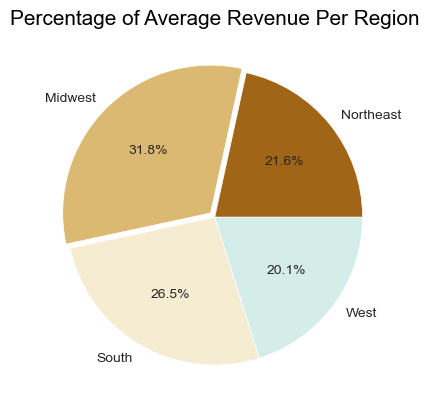

In [376]:
avg_northeast_revenue = round(geographical_northeast["avg_revenue"].mean(), 1)
avg_northeast_revenue

avg_midwest_revenue = round(geographical_midwest["avg_revenue"].mean(), 1)
avg_midwest_revenue

avg_south_revenue = round(geographical_south["avg_revenue"].mean(), 1)
avg_south_revenue

avg_west_revenue = round(geographical_west["avg_revenue"].mean(), 1)
avg_west_revenue

region_averages = [avg_northeast_revenue, avg_midwest_revenue, avg_south_revenue, avg_west_revenue]
region_averages

color = sns.color_palette("BrBG")
e = [0, 0.04, 0, 0]
l = ["Northeast", "Midwest", "South", "West"]
plt.pie(region_averages,
        labels=l,
        explode= e,
        colors=color,
        autopct="%.1f%%")
plt.title("Percentage of Average Revenue Per Region",
          fontsize=15,
          color="black")
print("The data indicates that the midwest region generates the highest average revenue per region.")

###### **Pie chart of the percentage of maximum revenue per geographical region**

The data indicates that the midwest region generates the highest maximum revenue per region.


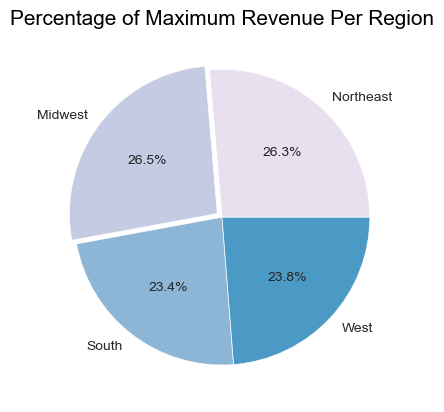

In [324]:
max_northeast_revenue = round(geographical_northeast["max_revenue"].max(), 1)
max_northeast_revenue

max_midwest_revenue = round(geographical_midwest["max_revenue"].max(), 1)
max_midwest_revenue

max_south_revenue = round(geographical_south["max_revenue"].max(), 1)
max_south_revenue

max_west_revenue = round(geographical_west["max_revenue"].max(), 1)
max_west_revenue

region_maximums = [max_northeast_revenue, max_midwest_revenue, max_south_revenue, max_west_revenue]
region_maximums

color = sns.color_palette("PuBuGn")
e = [0, 0.04, 0, 0]
l = ["Northeast", "Midwest", "South", "West"]
plt.pie(region_maximums,
        labels=l,
        explode= e,
        colors=color,
        autopct="%.1f%%")
plt.title("Percentage of Maximum Revenue Per Region",
          fontsize=15,
          color="black")
print("The data indicates that the midwest region generates the highest maximum revenue per region.")

###### **Pie chart of the percentage of miminum revenue per geographical region**

The data indicates that the midwest region generates the highest minimum revenue per region.


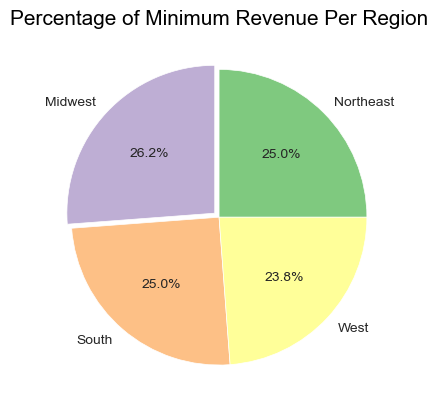

In [315]:
min_northeast_revenue = round(geographical_northeast["min_revenue"].mean(), 1)
min_northeast_revenue

min_midwest_revenue = round(geographical_midwest["min_revenue"].mean(), 1)
min_midwest_revenue

min_south_revenue = round(geographical_south["min_revenue"].mean(), 1)
min_south_revenue

min_west_revenue = round(geographical_west["min_revenue"].mean(), 1)
min_west_revenue

region_minimums = [min_northeast_revenue, min_midwest_revenue, min_south_revenue, min_west_revenue]
region_minimums

color = sns.color_palette("Accent")
e = [0, 0.04, 0, 0]
l = ["Northeast", "Midwest", "South", "West"]
plt.pie(region_minimums,
        labels=l,
        explode= e,
        colors=color,
        autopct="%.1f%%")
plt.title("Percentage of Minimum Revenue Per Region",
          fontsize=15,
          color="black")
print("The data indicates that the midwest region generates the highest minimum revenue per region.")

4. Which industries saw the largest average growth rate?

In [285]:
largest_avg_gowth_rate = Inc_5000_Companies.groupby("industry")["growth_%"].mean().sort_values(ascending=False).reset_index()
largest_avg_gowth_rate = round(largest_avg_gowth_rate, 2)
largest_avg_gowth_rate

def highlight_max_min(row):     # function defined and created to highlight all of values in a specific row
    max_value = row["max_revenue"].max()
    min_value = row["min_revenue"].min()
    return["background-color: green" if val == max_value
           else "background-color: red" if val == min_value
           else " " for val in row]
largest_avg_gowth_rate.style.background_gradient(subset=pd.IndexSlice[:,["growth_%"]], cmap="Greens")  

,industry,growth_%
0,Logistics & Transportation,717.560000
1,Consumer Products & Services,687.530000
2,Food & Beverage,668.230000
3,Computer Hardware,651.980000
4,Energy,592.080000
5,Retail,584.820000
6,Health,546.910000
7,Software,524.670000
8,Telecommunications,515.410000
9,Security,490.190000


The above chart displays the industries that have experienced the largest growth rates. I will now visualize the industries that experienced the largest growth rate from highest to lowest in a bar chart.

###### **Bar chart of the  industries that have experienced the largest growth rate**

Text(0.5, 0, '')

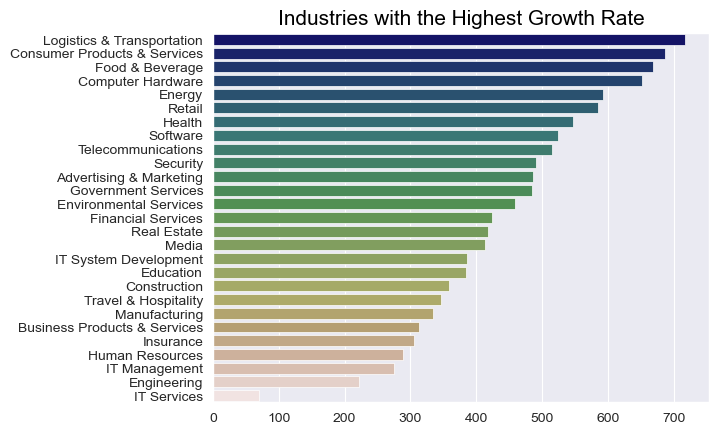

In [359]:
sns.barplot(data=largest_avg_gowth_rate, x="growth_%", y="industry", palette="gist_earth")
plt.title("Industries with the Highest Growth Rate",
          color="black",
          fontsize=15)
plt.ylabel("")
plt.xlabel("")


5. Which companies had the largest increase in staff/ new hires?

To begin this question, I will first create a variable with the results of the current workers subtracted by the previous workers to calculate the increase in staff/ new hires. I will then convert those results to a integer datatype and add those results as a column in the 'Inc_5000_Companies' dataframe. Finally, I will create a variable named 'most_company_new_hires' with the values of the company names and the calculated 'new hires' columns in descending order, displaying the top 10 companies which had the largest increase in staff/ new hires.

In [340]:
companies_new_hires = Inc_5000_Companies["workers"] - Inc_5000_Companies["previous_workers"]
Inc_5000_Companies["new hires"] = companies_new_hires.astype(int)
most_company_new_hires = Inc_5000_Companies[["name", "new hires"]].sort_values(by="new hires", ascending=False).reset_index()[:10]
top_10_most_company_new_hires = most_company_new_hires[["name", "new hires"]]
top_10_most_company_new_hires

,name,new hires
0,Allied Universal,118531
1,Alorica,43000
2,Infiniti HR,37145
3,CircusTrix,13739
4,ScribeAmerica,11641
5,TaskUs,9198
6,Freddy's Frozen Custard,6494
7,Pathway Vet Alliance,4174
8,Four Foods Group,3500
9,Pacific Dental Services,3356


I will now visualize the results of the top 10 companies with the largest increase in staff/ new hires.

###### **Bar chart of the top 10 companies with the largest increase in new hires**

The bar graph below shows that the company Allied Universal has had the largest increase in new hires.


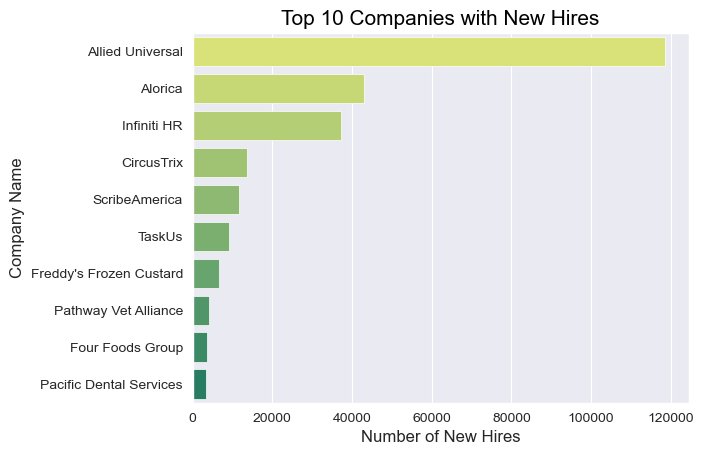

In [387]:
sns.barplot(data=top_10_most_company_new_hires,
            x="new hires",
            y="name",
            palette="summer_r")
plt.title("Top 10 Companies with New Hires",
          fontsize=15,
          color="black")
plt.ylabel("Company Name")
plt.xlabel("Number of New Hires")
print("The bar graph below shows that the company Allied Universal has had the largest increase in new hires.")

6. Did any companies increase revenue while reducing staff?

To tackle this question, I will create a variable named 'reduced_staff_increased_revenue' with the company name, growth percentage, revenue, and number of new hires columns. The negative value in the 'new hires' column represents the number of staff that was decreased. I will then sort the data by the values in the revenue column from highest to lowest which represents the companies with the highest revenue.

In [399]:
reduced_staff_increased_revenue = Inc_5000_Companies[Inc_5000_Companies["new hires"] < 0][["name", "growth_%", "new revenue", "new hires"]]
reduced_staff_increased_revenue = reduced_staff_increased_revenue.sort_values(by="new revenue", ascending=False).reset_index()
reduced_staff_increased_revenue = reduced_staff_increased_revenue[["name", "growth_%", "new revenue", "new hires"]]
reduced_staff_increased_revenue

,name,growth_%,new revenue,new hires
0,First American Payment Systems,77.1276,783.9,-243
1,Quantico Tactical,831.3181,492.5,-43
2,NCWC,142.2609,195.8,-71
3,Myriad360,64.8031,151.4,-3
4,Centrify,76.4500,114.6,-127
5,Republic Bank of Chicago,69.3883,109.5,-4
6,AEC Group,79.7589,97.7,-4
7,Momentum Telecom,67.4205,97.6,-11
8,Zefr,96.5302,91.8,-86
9,Coranet,97.8664,84.7,-7


To look further into this question, I will now look at the companies revenue that decreased by 100 or more staff.

In [404]:
reduced_staff_100 = reduced_staff_increased_revenue[reduced_staff_increased_revenue["new hires"] <= -100][["name", "growth_%", "new revenue", "new hires"]]
reduced_staff_100 = reduced_staff_100.reset_index()
reduced_staff_100

,index,name,growth_%,new revenue,new hires
0,0,First American Payment Systems,77.1276,783.9,-243
1,4,Centrify,76.4500,114.6,-127
2,14,IDS International Government Services,64.0436,44.7,-682
3,16,Akorbi,68.1185,39.3,-300
4,28,Prime Therapeutics,390.5654,21.4,-600
5,32,Integrity Services,72.2406,19.3,-150


The above dataframe displays the companies that decreased 100 or more staff. I will now visualize those results in the form of a bar graph.

###### **Bar graph of the companies that decreased staff by 100 or more**

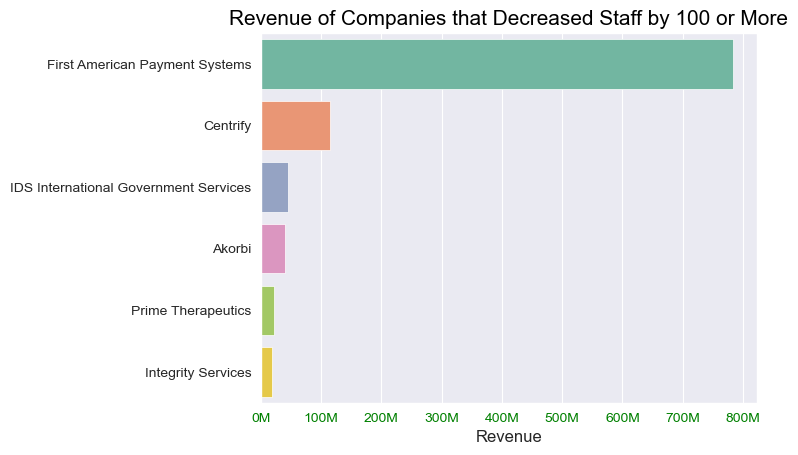

In [413]:
sns.barplot(data=reduced_staff_100, x="new revenue", y="name", palette="Set2")
plt.title("Revenue of Companies that Decreased Staff by 100 or More",
          color="black",
          fontsize=15)
d = list(range(0, 900, 100))
plt.xticks(d, [f"{m}M" for m in d],
           color="green")
plt.ylabel("")
plt.xlabel("Revenue")
print("")